In [63]:
#不使用numpy只用循环的方式
import random
import matplotlib.pyplot as plt

## 线性回归模型 Linear Regression

### 预测

In [64]:
#对直线上的点进行预测
def inference(w,b,x):
    return w*x+b

### 损失函数定义

In [65]:
#MSE：avg_loss = (wx+b-y)^2/2m  m或者2可以省去
def loss_function(w,b,x_list,gt_y_list):#gt=ground truth,指的是真实的标签的值
    avg_loss = 0
    for i in range(len(x_list)):
        avg_loss += 0.5*(w*x_list[i]+b-gt_y_list[i])**2#此处的**2表示平方的意思
    avg_loss /= len(gt_y_list)
    return avg_loss
    

### 负梯度计算

In [57]:
#梯度下降的做法
#该函数定义的是单个点的当前梯度
#针对的是线性模型y = wx + b
def gradient(pred_y,gt_y,x):
    diff = pred_y - gt_y#损失函数对sita0的偏导
    dw = diff*x#损失函数对sita1的偏导
    db = diff#此处的w,b分别对应sita1和sita0
    return dw,db

#随机梯度下降：只需要随机抽一些点加入负梯度的求解
#从m个样本中抽取k个参与到梯度更新，其中k<m
#这样做的目的是引入一些随机性，促进找到全局最优解

### batch size个数的样本带来的梯度

In [58]:
#计算梯度迭代
#只选用样本的一部分
def cal_step_gradient(batch_x_list,batch_gt_y_list,w,b,lr):#lr是学习率
    avg_dw,avg_db = 0,0
    batch_size = len(batch_x_list)
    #根据梯度公式进行求和
    for i in range(batch_size):
        pred_y = inference(w,b,batch_x_list[i])
        dw,db = gradient(pred_y,batch_gt_y_list[i],batch_x_list[i])
        avg_dw += dw
        avg_db += db
        
    avg_dw /= batch_size
    avg_db /= batch_size
    #梯度迭代，lr是学习率
    w = w - lr*avg_dw
    b = b - lr*avg_db
    return w,b

### 生成数据

In [59]:
def gen_sample_data():
    w = random.randint(0,10)+random.random()
    b = random.randint(0, 5)+random.random()
    
    num_sample = 100
    x_list = []
    y_list = []
    for i in range(num_sample):
        x = random.randint(0,100)*random.random()
        y = w*x+b+random.random()*random.randint(-1,100)
        x_list.append(x)
        y_list.append(y)
    return x_list,y_list

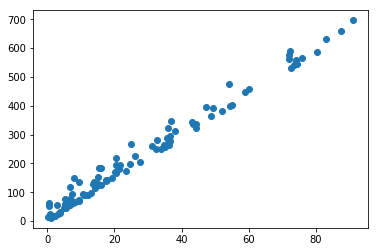

In [60]:
x_list,y_list = gen_sample_data()
plt.scatter(x_list,y_list)
plt.show()

In [67]:
def train(x_list,gt_y_list,batch_size,lr,max_iterations):
    w,b = 0,0
    num_sample = len(x_list)
    for i in range(max_iterations):
        batch_idxs = np.random.choice(len(x_list),batch_size)
        batch_x = [x_list[j] for j in batch_idxs]#把x_list中的第j个元素赋值给顺序赋值给batch_x列表
        batch_y = [y_list[j] for j in batch_idxs]#同上
        w,b = cal_step_gradient(batch_x,batch_y,w,b,lr)
        print('w:{0},b:{1}'.format(w,b))
        print('loss:{}'.format(loss_function(w,b,x_list,gt_y_list)))
    return w,b

In [69]:
train(x_list,y_list,60,0.0005,100)

w:5.533428012278696,b:0.1131420877443033
loss:3774.8367097153537
w:6.746666000596981,b:0.14592414460525022
loss:1070.5116332146745
w:7.475275420242843,b:0.16320861366697603
loss:415.1501938672386
w:7.822927043244887,b:0.1740804222928818
loss:358.56453279959055
w:7.700809326574283,b:0.17534670895749388
loss:359.5239316078724
w:7.74170652671449,b:0.1793177545708637
loss:356.88744907393186
w:7.883029565369922,b:0.18802145442946872
loss:365.48982109994233
w:7.613079613342516,b:0.18627628757781103
loss:372.6601446198243
w:7.736396186672238,b:0.19412051710333333
loss:356.9427853847469
w:7.654387862606358,b:0.19669344396405464
loss:364.9743545791352
w:7.612623510052022,b:0.20039010444667732
loss:372.56238351121533
w:7.7664312361064605,b:0.20687107230228025
loss:356.17098529387613
w:7.7362975583716596,b:0.21171143691282804
loss:356.76663101622137
w:7.8262881671181255,b:0.2176932018340457
loss:358.48981451785943
w:7.850919026628751,b:0.22201778650621162
loss:360.8787521310639
w:7.82665766016239

(7.726269622508899, 0.6076436826918433)